In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

Fashion-MNIST Dataset
labels: 0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot

In [ ]:
#import dataset and split into train and test data
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print("Length of train data" , len(x_train))
print("Length of test data" ,len(x_test))

Length of train data 60000
Length of test data 10000


example is a 28x28 grayscale image, associated with a label from 10 classes

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

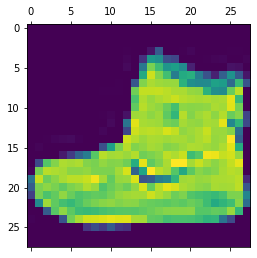

In [ ]:
#check first image
plt.matshow(x_train[0])

In [ ]:
#normalize the images by scaling pixel intensities to the range 0,1
x_train = x_train / 255 
x_test = x_test / 255

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

Define the network architecture using Keras

Creating the model

In [ ]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(100,activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 114,390
Trainable params: 114,390
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [ ]:
model.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

train model

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7288 - accuracy: 0.7568 - val_loss: 0.5530 - val_accuracy: 0.8063
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4904 - accuracy: 0.8303 - val_loss: 0.4862 - val_accuracy: 0.8297
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4462 - accuracy: 0.8422 - val_loss: 0.4565 - val_accuracy: 0.8444
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4189 - accuracy: 0.8530 - val_loss: 0.4314 - val_accuracy: 0.8490
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3995 - accuracy: 0.8597 - val_loss: 0.4563 - val_accuracy: 0.8328
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3843 - accuracy: 0.8644 - val_loss: 0.4108 - val_accuracy: 0.8554
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3712 - accuracy: 0.8685 - val_loss: 0.3996 - val_accuracy:

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3481 - accuracy: 0.8750
Loss=0.348
Accuracy=0.875


Predictions on new data points

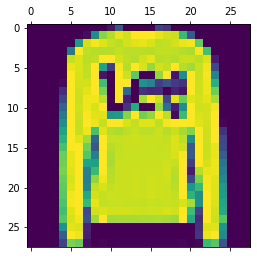

In [ ]:
plt.matshow(x_test[1])

In [ ]:
x_test.shape

(10000, 28, 28)

 labels: 0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot

In [ ]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Image is= %d" %np.argmax(predicted_value[1]))

Image is= 2


In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag", "Ankle boot"]

In [ ]:
class_labels[np.argmax(predicted_value[1])]

'Pullover'

In [ ]:
import random

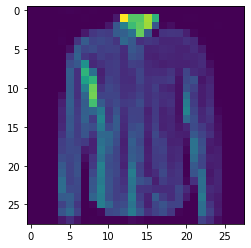

In [ ]:
n=random.randint(0,9999)
plt.imshow(x_test[n])

In [ ]:
class_labels[np.argmax(predicted_value[n])]

'Shirt'

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

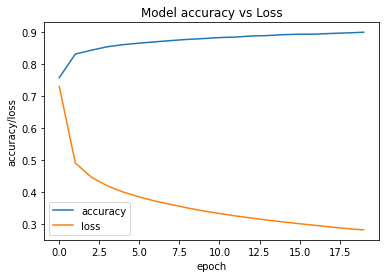

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title("Model accuracy vs Loss")
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy','loss'],loc='best')
plt.show()

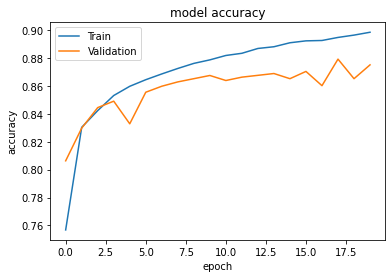

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

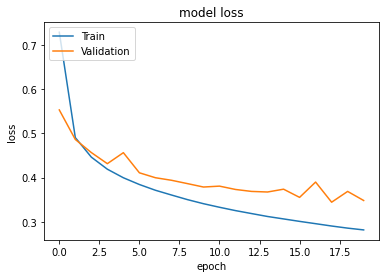

In [ ]:
plt.plot (history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend (['Train', 'Validation'], loc='upper left') 
plt.show()